## SEGMENTATION D'UNE BASE DE DONNEES CLIENT

1 - Analyse Exploratoire des Données

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Chargement du dataSet
data = pd.read_csv('segmentation.csv',sep='\t',parse_dates=[7])

In [86]:
data.duplicated().sum()

0

In [40]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [41]:
df = data.copy()

In [42]:
data.shape

(2240, 29)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [44]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


* Visualisation de la distribution des données au niveau des variables

Text(0.5, 1.0, 'Distribution de la variable Education')

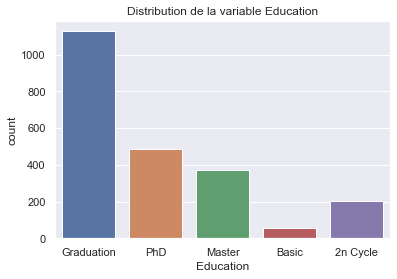

In [45]:
sns.countplot(x='Education',data = data)
plt.title('Distribution de la variable Education')

* Il y a un très grand nombre de client de notre jeu de données qui sont diplomés, Cette Variable pourrait nous aidés à faire une meilleur segmentation

Text(0.5, 1.0, 'Distribution de la variable Marital_Status')

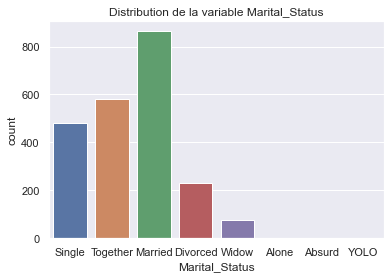

In [46]:
sns.countplot(x='Marital_Status',data = data)
plt.title('Distribution de la variable Marital_Status')

* Il y a un très grand nombre de clients qui sont mariés

In [47]:
data['Old_client'] = 2020 - data['Year_Birth']

Text(0.5, 0, 'Age')

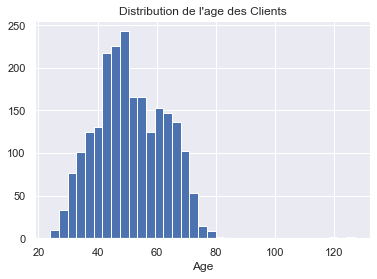

In [48]:
data.hist('Old_client', bins=35)
plt.title('Distribution de l\'age des Clients')
plt.xlabel('Age')

* Les âges se situent pour la plupart entre 45 et 55 ans.

Text(0.5, 0, 'Income')

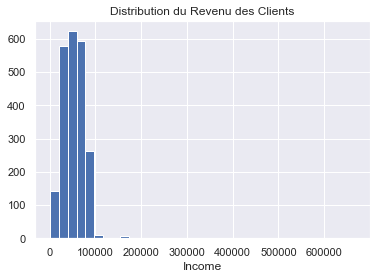

In [49]:
data.hist('Income', bins=35)
plt.title('Distribution du Revenu des Clients')
plt.xlabel('Income')

* La mojorité des clients ont un revenu compris entre 0 et 10000

Text(0.5, 0, 'Kidhome')

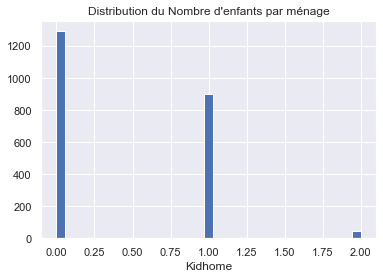

In [50]:
data.hist('Kidhome', bins=35)
plt.title('Distribution du Nombre d\'enfants par ménage')
plt.xlabel('Kidhome')

* Le nombre de client n'ayant pas d'enfants est largement superieur au nombre de client ayant 1 enfant ou 2.

Text(0.5, 0, 'Teenhome')

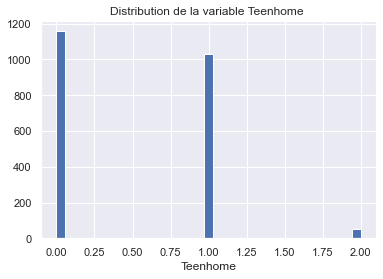

In [51]:
data.hist('Teenhome', bins=35)
plt.title('Distribution de la variable Teenhome ')
plt.xlabel('Teenhome')

* Le nombre de client n'ayant pas d'adolesent dans son ménage est largement superieur au nombre de client ayant 1 d'adolesent ou 2.
* La distribution de la variable Kidhome est presque identique a celle de la variable Teenhome, On peux supposer que ces deux variable apporte la même information

In [52]:
data['Customer_Seniority'] = data['Dt_Customer'].dt.year

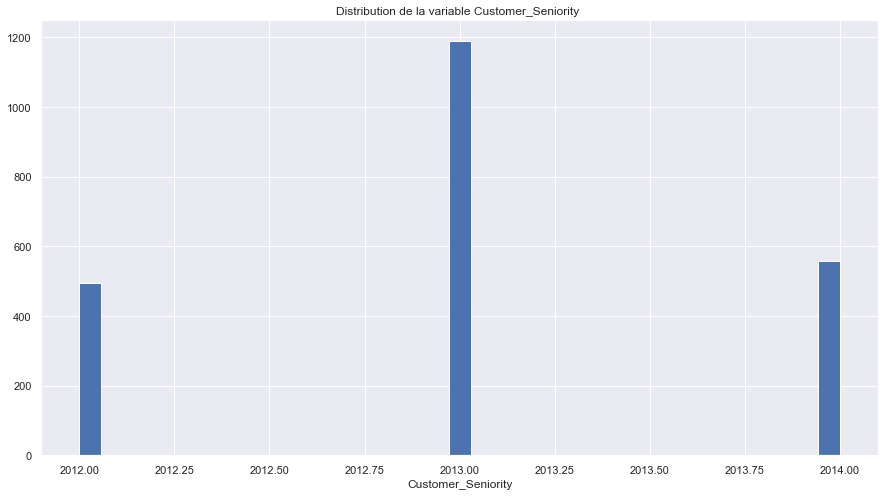

In [53]:
data.hist('Customer_Seniority', bins=35,figsize=(15,8))
plt.title('Distribution de la variable Customer_Seniority ')
plt.xlabel('Customer_Seniority')
plt.show()

* A travers l'année d'inscription, nous avons trois groupes : 
    - Le groupe des clients inscris en 2012, les moyens nombreux
    - Le groupe des clients inscris en 2013, les plus nombreux
    - Et ceux inscrit en 2014.

Text(0.5, 0, 'Recency')

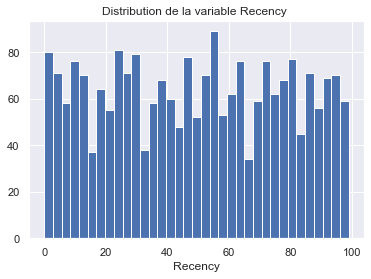

In [54]:
data.hist('Recency', bins=35)
plt.title('Distribution de la variable Recency ')
plt.xlabel('Recency')

* En moyen il y a 49 jours que tous les clients ont effectués leurs dernier un achat.

Text(0.5, 0, 'Complain')

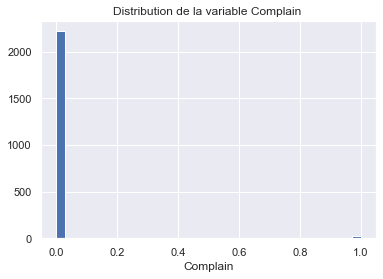

In [55]:
data.hist('Complain', bins=35)
plt.title('Distribution de la variable Complain ')
plt.xlabel('Complain')

* Au cours de ces 2 dernière année une minorité des clients ce sont plaints

In [56]:
data[['MntWines','MntFruits','MntMeatProducts',
              'MntFishProducts','MntSweetProducts','MntGoldProds']].sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

* Le produit le plus acheté par les client au cour de ces deux dernière année est le Vin
* Ensuite viens la viande
* Après le montant en Or

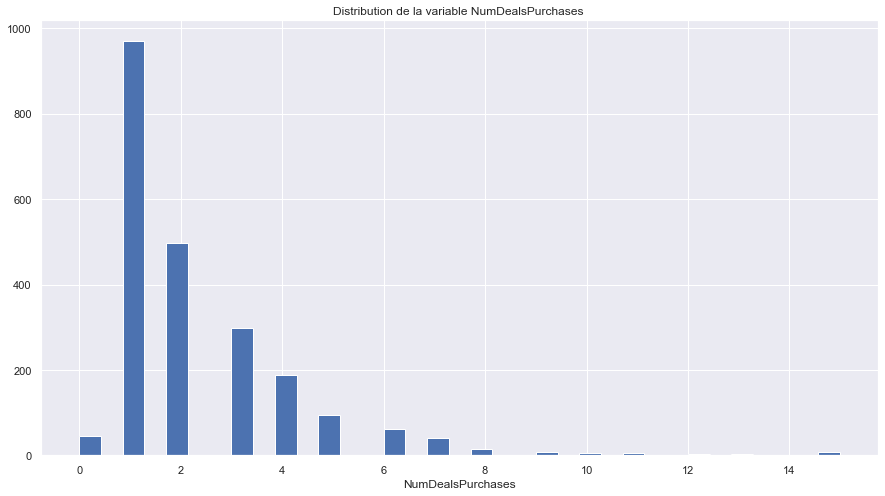

In [57]:
data.hist('NumDealsPurchases', bins=35,figsize=(15,8))
plt.title('Distribution de la variable NumDealsPurchases ')
plt.xlabel('NumDealsPurchases')
plt.show()

* La majeur partie des client ont une fois éffectué des achas avec remis

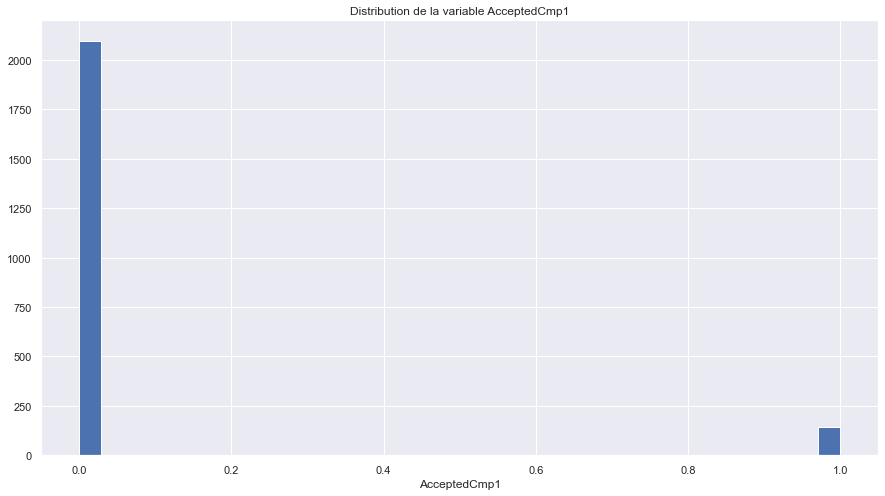

In [58]:
data.hist('AcceptedCmp1', bins=35,figsize=(15,8))
plt.title('Distribution de la variable AcceptedCmp1')
plt.xlabel('AcceptedCmp1')
plt.show()

* La majeur partie des client non pas accepté l'ordre lors de la 1ére Campagne

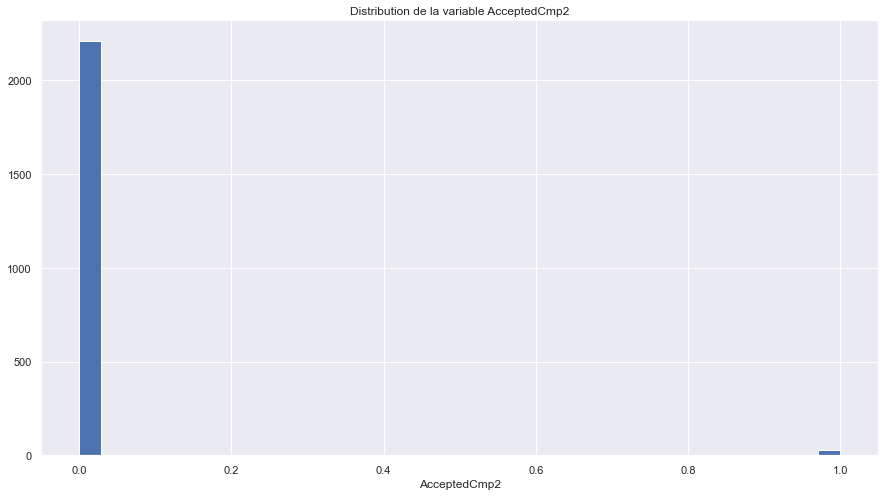

In [59]:
data.hist('AcceptedCmp2', bins=35,figsize=(15,8))
plt.title('Distribution de la variable AcceptedCmp2')
plt.xlabel('AcceptedCmp2')
plt.show()

* La majeur partie des client non pas accepté l'ordre lors de la 2ième Campagne

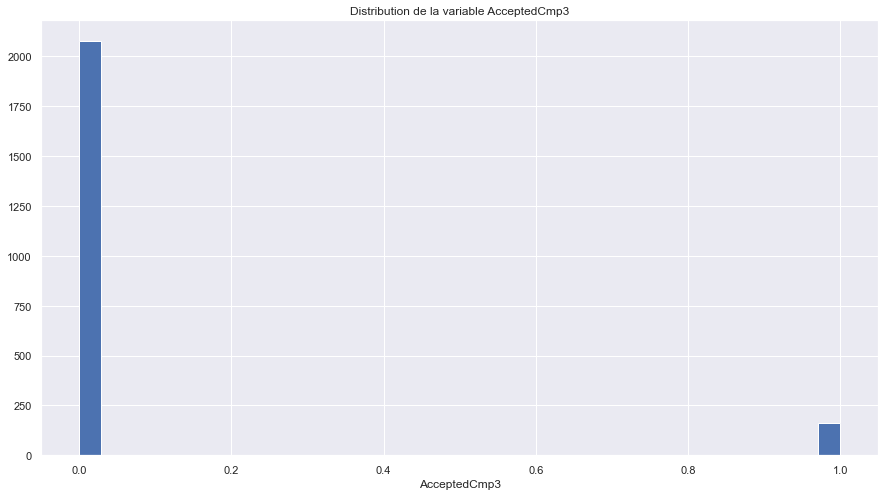

In [60]:
data.hist('AcceptedCmp3', bins=35,figsize=(15,8))
plt.title('Distribution de la variable AcceptedCmp3')
plt.xlabel('AcceptedCmp3')
plt.show()

* La majeur partie des client non pas accepté l'ordre lors de la 3ième Campagne

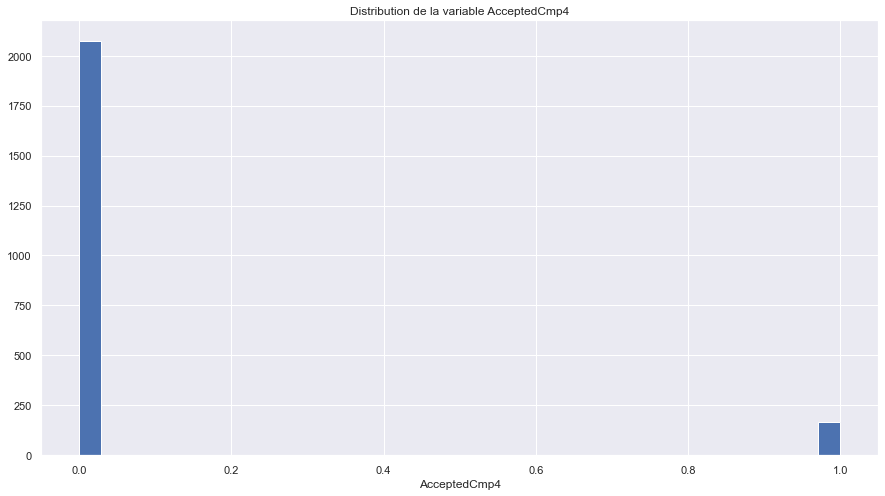

In [61]:
data.hist('AcceptedCmp4', bins=35,figsize=(15,8))
plt.title('Distribution de la variable AcceptedCmp4')
plt.xlabel('AcceptedCmp4')
plt.show()

* La majeur partie des client non pas accepté l'ordre lors de la 4ième Campagne

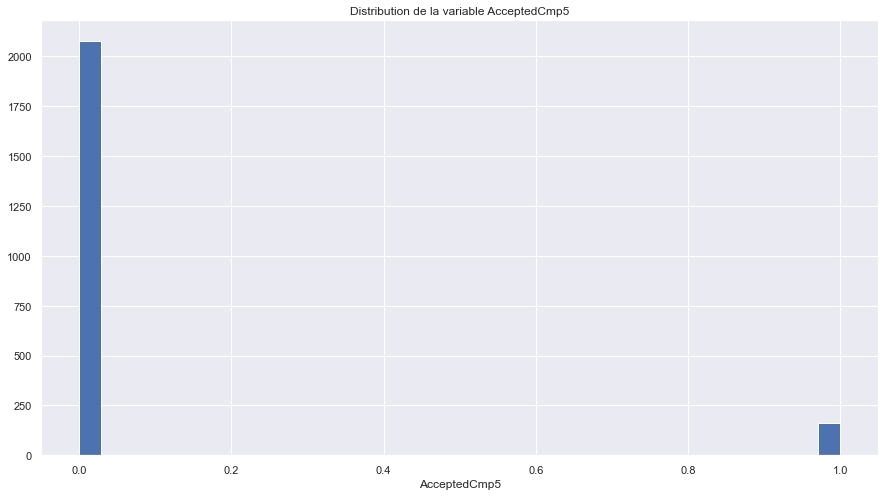

In [62]:
data.hist('AcceptedCmp5', bins=35,figsize=(15,8))
plt.title('Distribution de la variable AcceptedCmp5')
plt.xlabel('AcceptedCmp5')
plt.show()

* La majeur partie des client non pas accepté l'ordre lors de la 5ième Campagne.

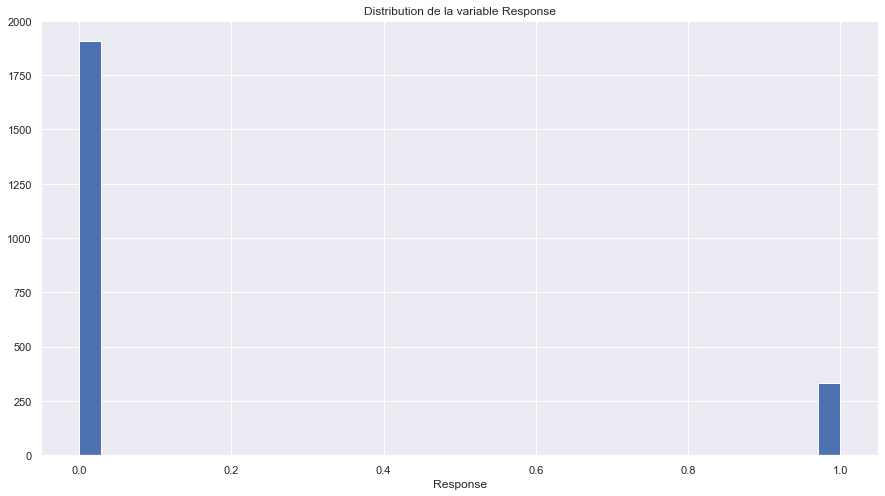

In [63]:
data.hist('Response', bins=35,figsize=(15,8))
plt.title('Distribution de la variable Response')
plt.xlabel('Response')
plt.show()

* La majeur partie des clients non pas accepté l'ordre lors de la dernière Campagne

* Les Variables AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5 et Response ont quasiment la même distribution, on peut suppopé qu'ils apportent la même information, Nous essayerons de les mettre ensemble.

In [64]:
data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].sum()

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumWebVisitsMonth      11909
dtype: int64

- Le nombre de clients effectuant les achats en boutique sont plus nombreux.

Visualisation de la Matrice de Correlation

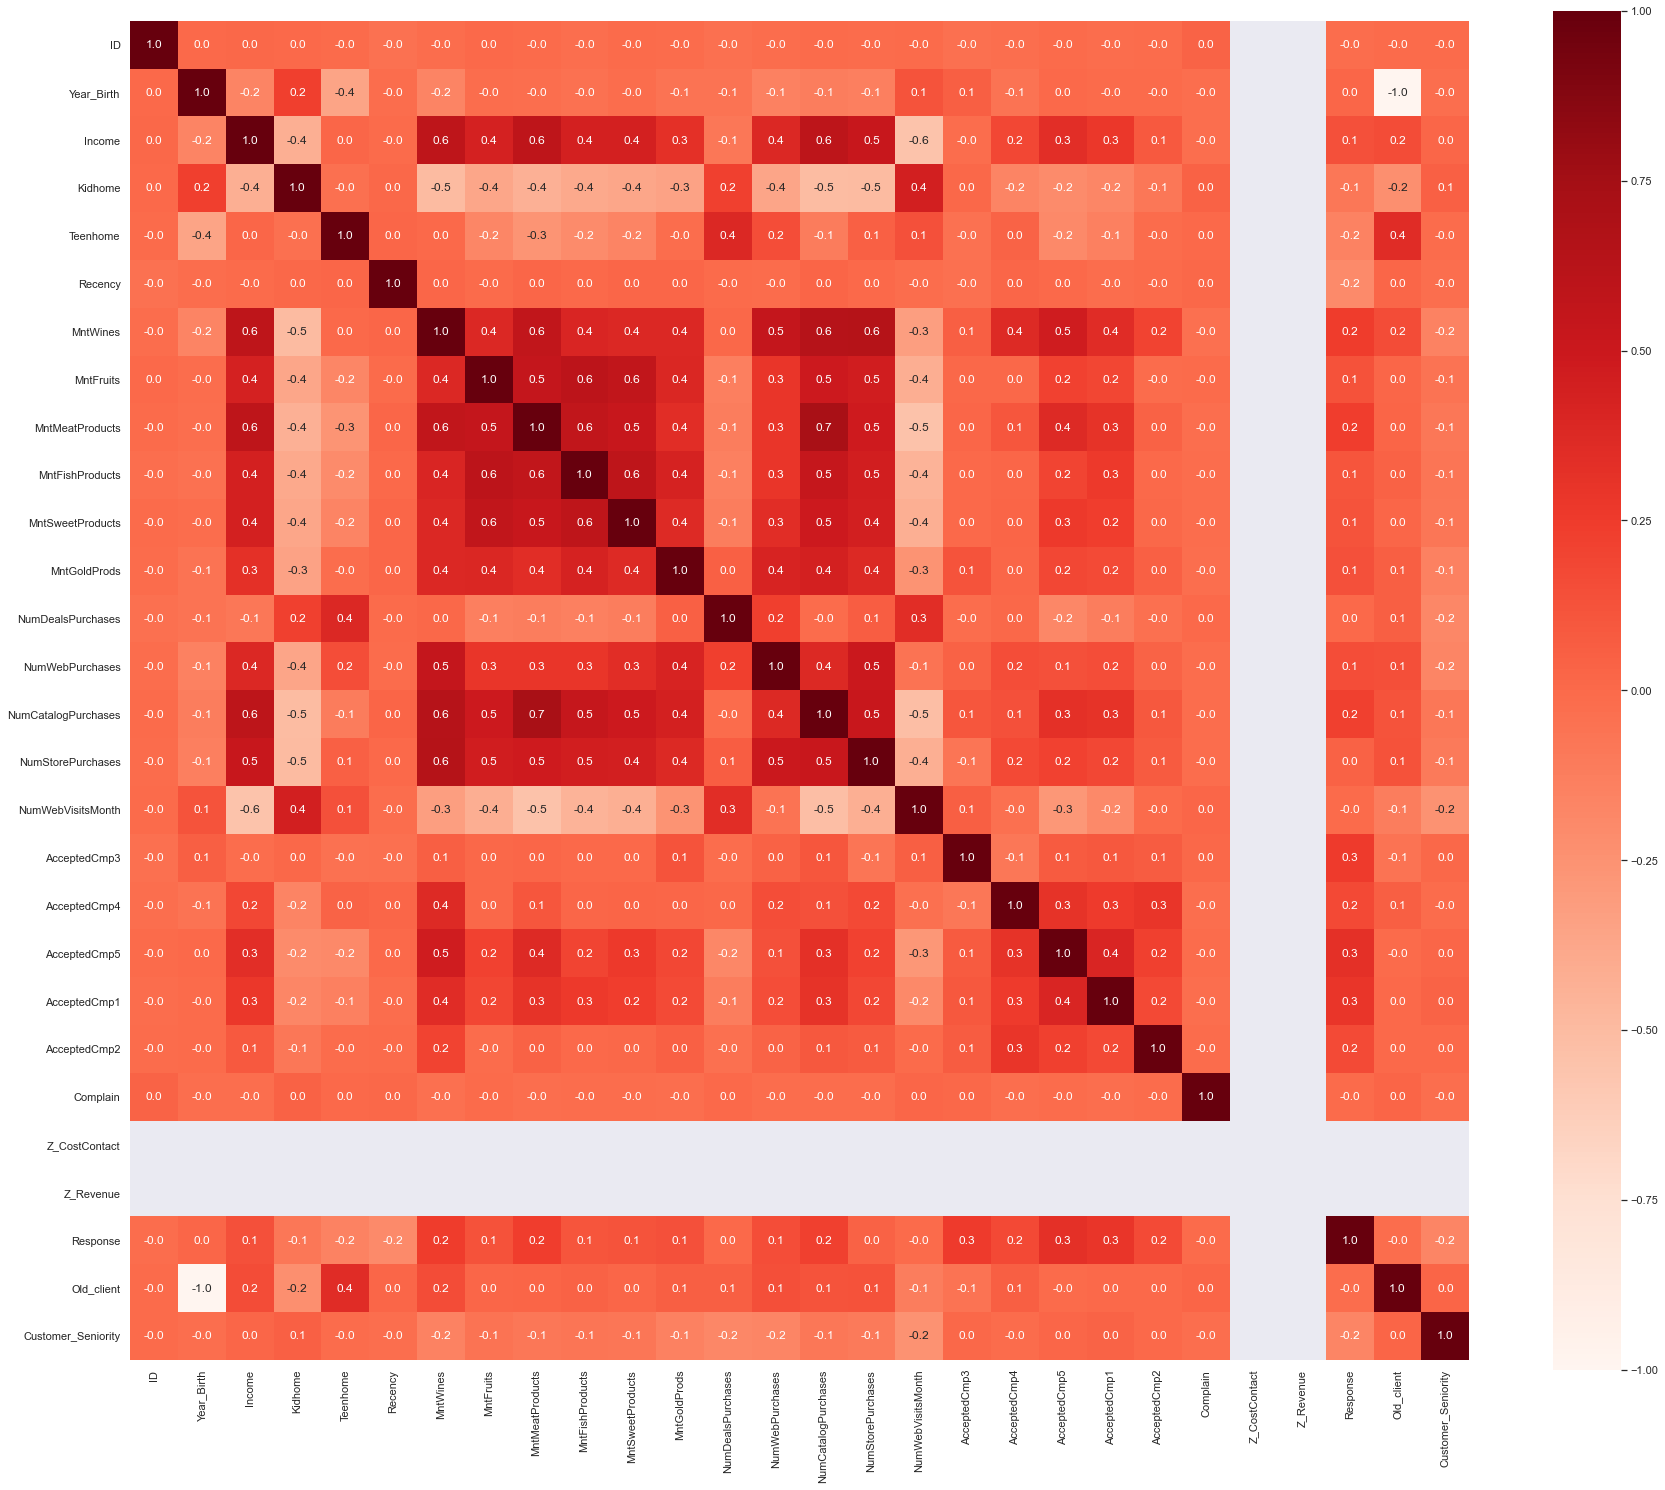

In [84]:
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),square=True,fmt='.1f',annot=True,cmap='Reds')
plt.show()

Nous voyons il n'exist pas une très forte relation entre les variables

* Conclusion
   - Les variable Teenhome et Kidhome ont la même distribution,il apporte la même information      il va falloir choisir le plus pertinent pour la modelisation.
   - La variable Dt_Customer n'est pas significative nous allons plutôt en extraire le nombre   d'année d'ancienneté du client

2 - Préprocessing

In [66]:
prd = df.copy()

In [67]:
prd.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


* Verification des données manquante

In [68]:
prd.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Seul la variable 'Income' Contient des valeurs manquante.

In [69]:
prd['Income'].isna().sum()

24

* Nous avons 24 valeurs manquante.
* Le nombre de valeurs manquante largement inferieur au nombre d'individu contenu dans notre dataset, nous allons donc supprimé les individu avec les valeurs manquantes.

In [70]:
prd = prd.dropna(axis=0)

In [71]:
prd.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Reconstitution du Dataset en mettant ensemble les Donnés qui apportent les mêmes information.
    - AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5 et Response apportent la même information, Nous allons garder Accept et Supprimé les autres.
    - Kidhome et Teenhome ont quasiment les même information, nous gardons donc Kidhome
    - Creation d'une nouvelle variable Client_depuis a parti de Dt_customer et suppression de Dt_customer.
    - Creation d'une nouvelle variable Age_client a parti de son année de naissance
    - Suppression de la variable ID

In [72]:
prd.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [73]:
prd = prd.drop('ID',axis=1)

In [75]:
prd = prd.drop(['AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue',
           'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Teenhome'], axis=1)

In [76]:
prd['Age_client'] = 2020 - prd['Year_Birth']
prd['Client_depuis(an)'] = 2020 - prd['Dt_Customer'].dt.year

In [77]:
prd = prd.drop(['Year_Birth','Dt_Customer'], axis=1)

In [78]:
prd.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age_client',
       'Client_depuis(an)'],
      dtype='object')

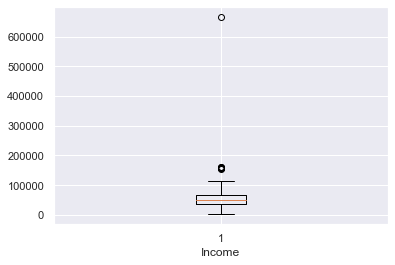

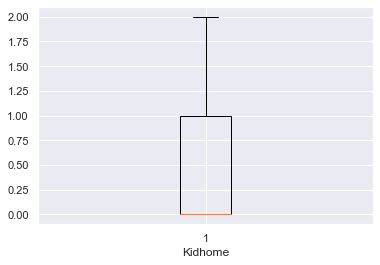

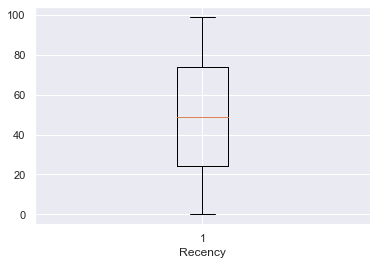

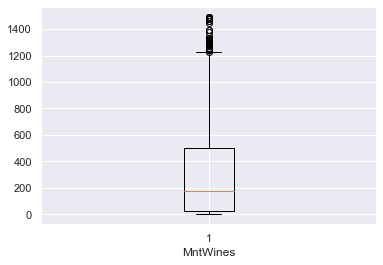

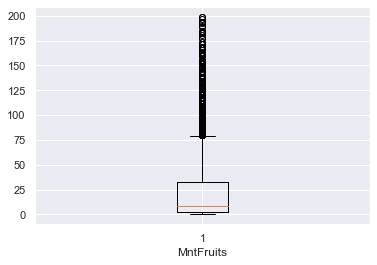

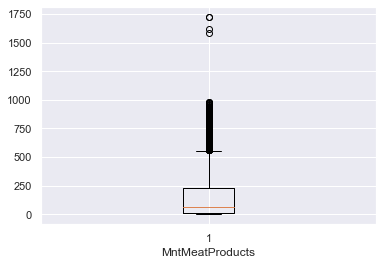

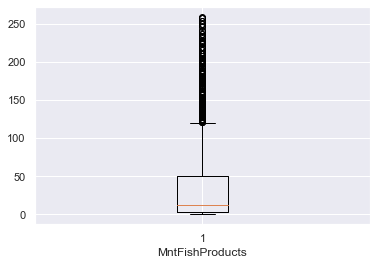

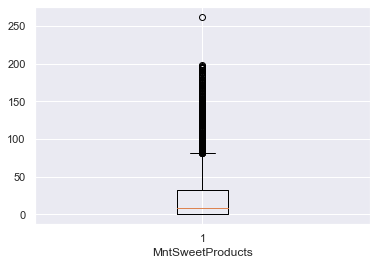

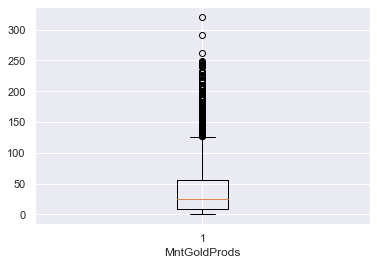

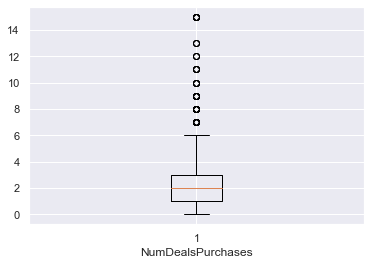

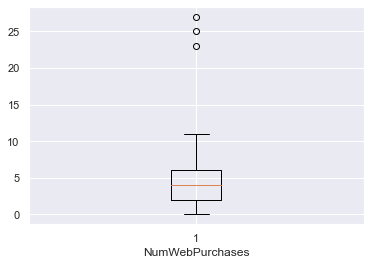

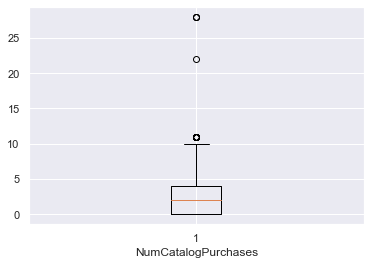

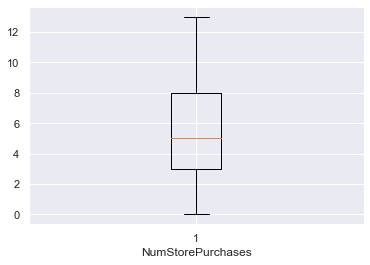

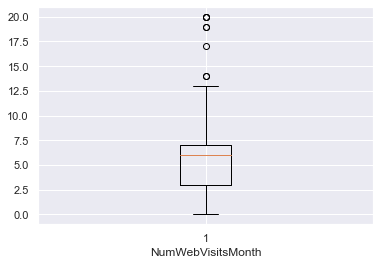

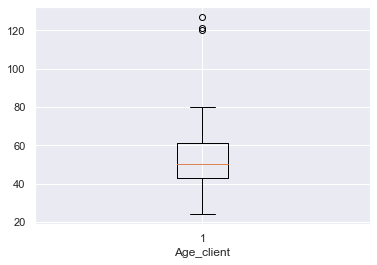

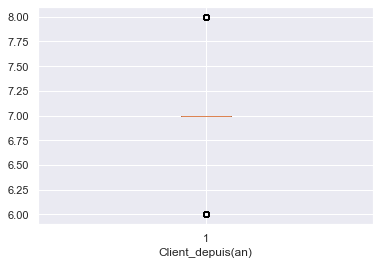

In [79]:
for col in prd.columns:
    if prd[col].dtypes != 'object':
        if col not in ['Complain','Response','Response']:
            plt.boxplot(prd[col])
            plt.xlabel(col)
            plt.show()

- La plupart des variable contiennent des valeurs aberrante que nous devons traiter

 * Visualisation de l'echelle des Variable.

In [ ]:
prd.info()

In [82]:
quanty_col = []
for col in prd.columns:
    if prd[col].dtypes != 'object':
        if col not in ['Complain','Response','Response']:
            quanty_col.append(col)

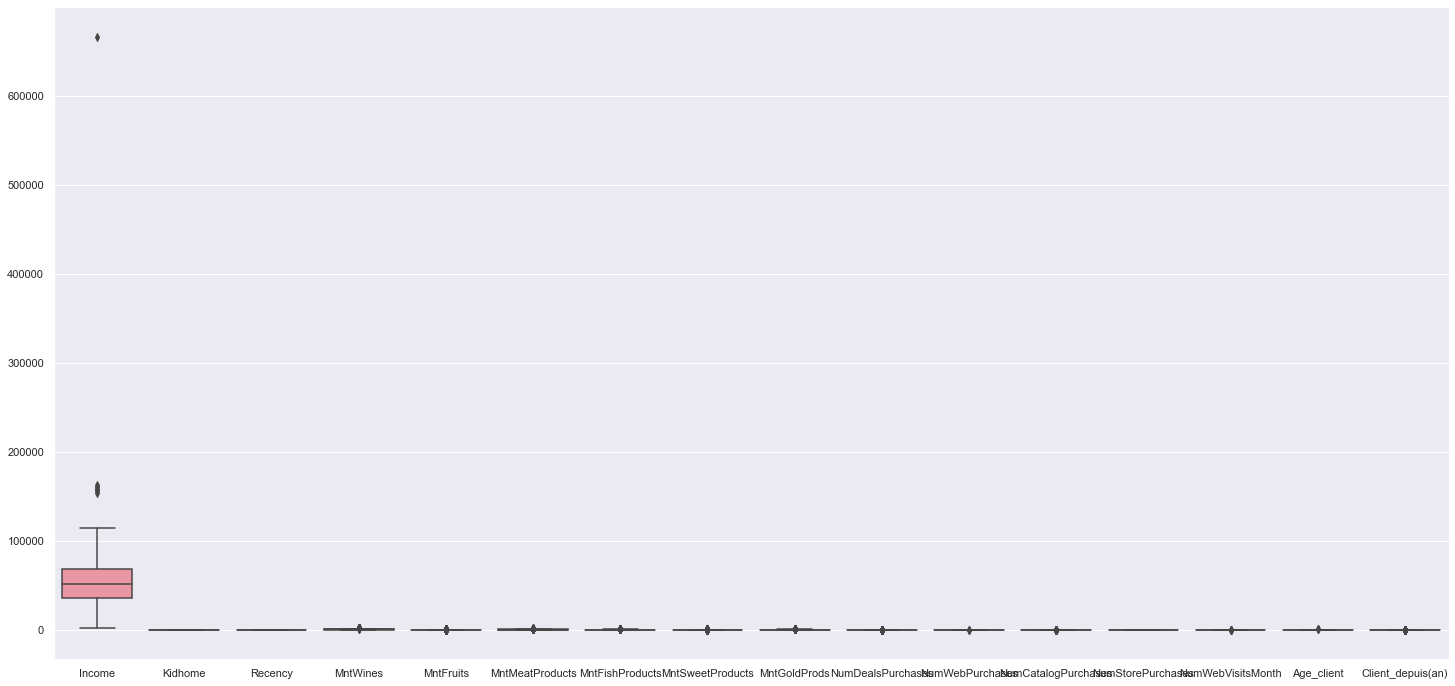

In [83]:
plt.figure(figsize=(25,12))
sns.boxplot(data=prd[quanty_col])
plt.show()

In [85]:
#Valeur dipluqué
prd.duplicated().sum()

182